In [2]:
import pandas as pd
import numpy as np

# Se crea un DataFrame de ejemplo
data = {
    'ClienteID': range(1, 201),
    'Edad': np.random.randint(18, 70, size=200),
    'Ingreso_Anual': np.random.randint(15000, 150000, size=200),
    'Puntaje_Gasto': np.random.randint(1, 100, size=200)
}

df = pd.DataFrame(data)

In [3]:
# Resumen estadístico del DataFrame
df.describe()

,ClienteID,Edad,Ingreso_Anual,Puntaje_Gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,45.945000,82183.940000,54.490000
std,57.879185,15.562872,39084.012057,27.885442
min,1.000000,18.000000,15023.000000,1.000000
25%,50.750000,31.000000,50628.000000,31.500000
50%,100.500000,50.000000,78661.000000,57.000000
75%,150.250000,60.000000,118831.000000,79.000000
max,200.000000,69.000000,149674.000000,99.000000


C:\Users\FABLAB-PC-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FABLAB-PC-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FABLAB-PC-02\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


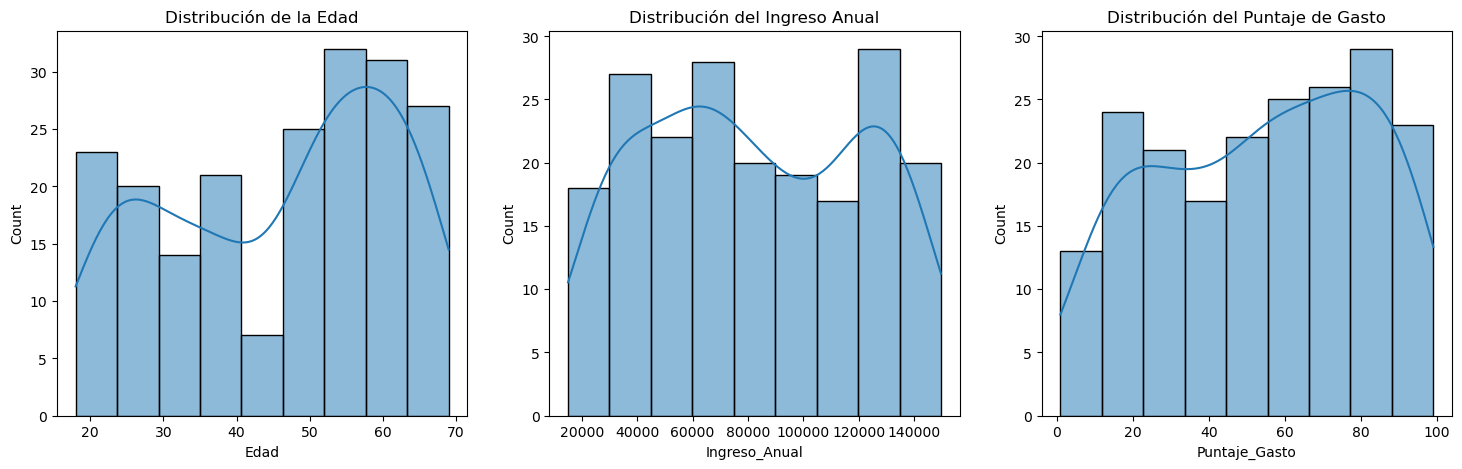

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de las distribuciones de Edad, Ingreso Anual y Puntaje de Gasto
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Edad'], kde=True)
plt.title('Distribución de la Edad')

plt.subplot(1, 3, 2)
sns.histplot(df['Ingreso_Anual'], kde=True)
plt.title('Distribución del Ingreso Anual')

plt.subplot(1, 3, 3)
sns.histplot(df['Puntaje_Gasto'], kde=True)
plt.title('Distribución del Puntaje de Gasto')

plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

# Selección de características para clustering
features = df[['Edad', 'Ingreso_Anual', 'Puntaje_Gasto']]

# Normalización de las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [6]:
from sklearn.cluster import DBSCAN

# Se ajustan los parámetros eps y min_samples
eps = 0.5
min_samples = 5

# Se aplica DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)

# Se agregan los clusters al DataFrame original
df['Cluster'] = clusters

# Mostrar las primeras filas del DataFrame con los clusters
df.head()


,ClienteID,Edad,Ingreso_Anual,Puntaje_Gasto,Cluster
0,1,65,63579,70,3
1,2,38,83219,53,-1
2,3,67,122291,37,11
3,4,52,87079,57,0
4,5,64,24786,38,1


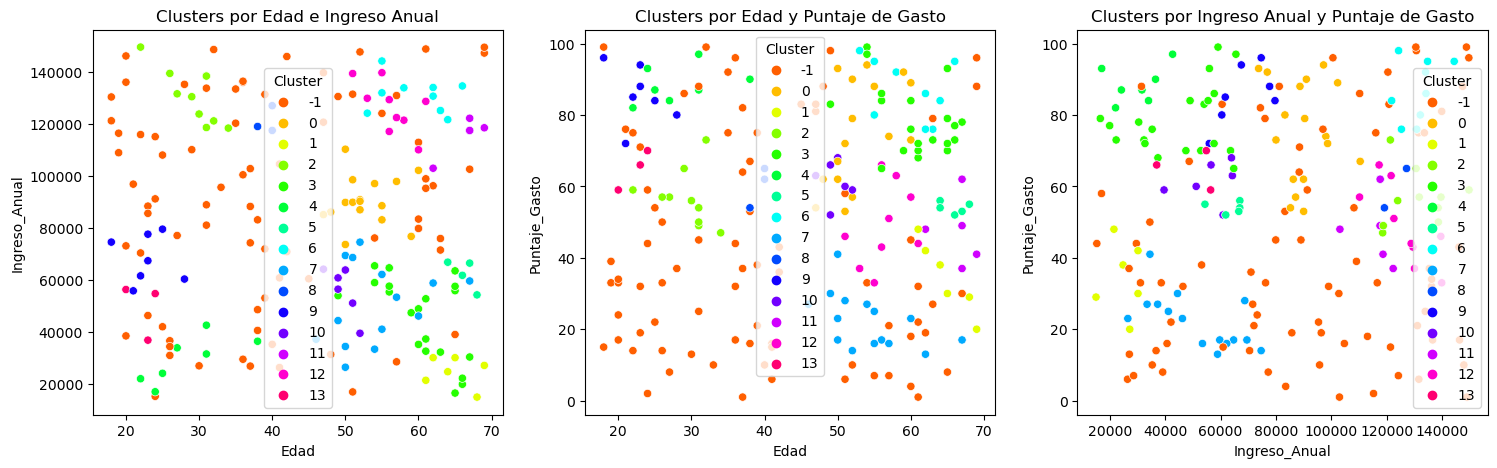

In [7]:
import matplotlib.pyplot as plt

# Configurar la paleta de colores
palette = sns.color_palette("hsv", len(set(clusters)))

# Visualización de los clusters
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Edad', y='Ingreso_Anual', hue='Cluster', palette=palette)
plt.title('Clusters por Edad e Ingreso Anual')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Edad', y='Puntaje_Gasto', hue='Cluster', palette=palette)
plt.title('Clusters por Edad y Puntaje de Gasto')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Ingreso_Anual', y='Puntaje_Gasto', hue='Cluster', palette=palette)
plt.title('Clusters por Ingreso Anual y Puntaje de Gasto')

plt.show()


### El cluster -1, que representa el ruido, está presente en todos los gráficos, indicando que hay datos que no se ajustan bien a ningún cluster definido. Esto puede ser debido a outliers o datos con características únicas. La presencia de múltiples clusters en todas las combinaciones indica que DBSCAN ha podido identificar una variedad de patrones en los datos. Esto sugiere que el conjunto de datos tiene una estructura compleja con múltiples grupos naturales. Por ejemplo, para los Clusters por Edad e Ingreso Anual: 
### - Cluster 0 (color azul): Se encuentra predominantemente en ingresos anuales medios y bajos.
### - Cluster 1 (color verde claro): Se encuentra distribuido en edades jóvenes a medias con ingresos medios.
### - Cluster 2 (color naranja): Se encuentra principalmente en edades más jóvenes y mayores con ingresos variados.
### Hay una buena diferenciación entre grupos en diferentes combinaciones de edades e ingresos.

### La aplicación de DBSCAN ha revelado una estructura subyacente compleja en el conjunto de datos, identificando múltiples grupos naturales en diferentes combinaciones de características. A diferencia de K-Means, DBSCAN forma clusters en áreas de alta densidad de puntos y puede identificar clusters de formas arbitrarias y de tamaño variable. Además, DBSCAN identifica y maneja explícitamente los puntos que no pertenecen a ningún cluster (ruido) y no requiere especificar el número de clusters a priori.
